# Phase 1: Use tweepy to gain a critical mass of tweets regarding a chosen topic and annotate the sentiment of the tweets;
#          positive, negative, neutral.

#          Clean and organise the data, remove duplicates and use techniques from text classification exercise such as stopping 
#          and stemming to  prepare the dataset.



# Phase 2: Create a model which can accurately assign a  polarity to a group of new tweets within the chosen topic. 
#          Test your model against a different domain eg politics model on sports or tech.



In [441]:
# Chosen Topic for Twitter Data Streaming -> US Political Personalities ("Hilary Clinton", "Trump", "Obama", "Bernie Snders")
# tweets fetched from -> March 2021 till April 2021.
# Chosen Dataset for Training-> AmericaN Airlines.

# https://github.com/Roopesh-Bharatwaj-K-R/Twitter-Sentiment-Analysis-Vader-NaiveBayes/blob/main/ROOPESH_twitter.ipynb

In [442]:
# STEPS CARRIED OUT:

# 1-> Feature Engineering for Fetched Data in Twitter
# 2-> Removing Patterns from Tweet
# 3-> Performing Vader for the tweets
# 4-> NLP:  Stop words, Stemmer, Lemmatizes, TFIDF 

# 5-> Modelling Hand Annotated Tweets
    # 5.1 -> Naive Bayes
    # 5.2 -> SVM RBF Kernel
    # 5.3 -> MLP Classifier
    # 5.4 -> Perceptron 
    
# 6-> Overall Accuraccy for the Hand Annotated Tweets

# 7-> Comparing Vader with each Models for Accuracy
    # 7.1 -> Overall Accuracy for Vader tweets with Model result
    
# 8-> Testing of Airlines Dataset
    # 8.1-> Testing tweets with each Models( Naive Bayes/SVM/MLP/Perceptron)
    # 8.2 -> using both given annotation in dataset and the vader annotation
    # 8.3 -> Overall Tested Results.

#9-> conclusion.
    

In [443]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from datetime import datetime
import time
import matplotlib.pyplot as plt

In [444]:
# lOADING OF COMPLETE 750+ HAND ANNOTATED TWEETS.

In [445]:
csv= pd.read_csv("C:/Users/user/PycharmProjects/Twitter _tweets_fetching/tweets_csv/new_csv/combined_csv.csv")

# FEATURE ENGINEERING

In [446]:
csv.dropna(inplace= True)

In [447]:
csv.drop(csv.iloc[:, 0 :1], inplace = True, axis = 1)

In [448]:
csv.drop(csv.columns[0], axis = 1, inplace = True)

In [449]:
csv.drop(csv.columns[1], axis = 1, inplace = True)

In [450]:
csv

,Tweet,Hand_Annotated_Sentiment
0,"text:""ofc liberals are on the opposite side of...",Neutral
4,"text:""Bernie Sanders reveals that the family f...",Positive
8,"text:""TRUE TRUE TRUE""",Neutral
14,"text:""The Neverending Grift""",Negative
16,"text:""Bernie Sanders is including the $Positiv...",Positive
...,...,...
5608,"text:""presidency",Neutral
5618,"text:""@sharon4marie Reminds me of how this God...",Positive
5624,"text:""@DLoesch Kamala Harris\nBarack Obama.""",Neutral
5626,"text:""@schnaw_ @WarnerMedia @Twitter Twitter h...",Negative


# Removing Patterns from Tweet

In [451]:
#cleaning the tweets
import re
def remove_pattern(input_txt, pattern):
    r = re.findall(pattern, input_txt)
    for i in r:
        input_txt = re.sub(i, '', input_txt)        
    return input_txt

def cleaning_tweets(tweets):
    # remove twitter Return handles (RT @xxx:)
    tweets = np.vectorize(remove_pattern)(tweets, "RT @[\w]*:") 
    tweets = np.vectorize(remove_pattern)(tweets, "text:") # removing text in the tweets
    tweets = np.vectorize(remove_pattern)(tweets, "ud83d")  # removing most repeated Emoji
    tweets = np.vectorize(remove_pattern)(tweets, "ude2d")   # removing most repeated Emoji
    tweets = np.vectorize(remove_pattern)(tweets, "u2026")    # removing most repeated Emoji
    tweets = np.vectorize(remove_pattern)(tweets, "udce3") 
    tweets = np.vectorize(remove_pattern)(tweets, "ud83e")
    tweets = np.vectorize(remove_pattern)(tweets, "udd2c")    #"ud83e", "udd2c") # ud83e\udd2c\ud83e\ u2019
    tweets = np.vectorize(remove_pattern)(tweets, "u2019")
    
    # remove twitter handles (@xxx)
    tweets = np.vectorize(remove_pattern)(tweets, "@[\w]*")
    
    # remove URL links (httpxxx)
    tweets = np.vectorize(remove_pattern)(tweets, "https|http?://\\/\\/[A-Za-z0-9./]*")
    tweets = np.vectorize(remove_pattern)(tweets, "#*" ) # remove # tag
    tweets = np.vectorize(remove_pattern)(tweets, "\n*" )
    
    # remove special characters, numbers, punctuations (except for #)
    tweets = np.core.defchararray.replace(tweets, "[^a-zA-Z]", " ")
    tweets = np.core.defchararray.replace(tweets, "[\/?!:.""'']", " ")
    
    
    
    return tweets
cleaning = lambda a: cleaning_tweets(a)

In [452]:

csv.Tweet= pd.DataFrame(csv.Tweet.apply(cleaning))



In [453]:
#csv.Tweet.head(60)

In [454]:
csv.drop_duplicates(keep=False,inplace=True)

In [455]:
csv

,Tweet,Hand_Annotated_Sentiment
0,"""ofc liberals are on the opposite side of that...",Neutral
4,"""Bernie Sanders reveals that the family feel s...",Positive
8,"""TRUE TRUE TRUE""",Neutral
14,"""The Neverending Grift""",Negative
16,"""Bernie Sanders is including the $Positive5 mi...",Positive
...,...,...
5608,"""presidency",Neutral
5618,""" Reminds me of how this God-fearing country u...",Positive
5624,""" Kamala Harris\nBarack Obama.""",Neutral
5626,""" Twitter has your image flagged as \""potent...",Negative


In [456]:
# wordcloud in the tweets

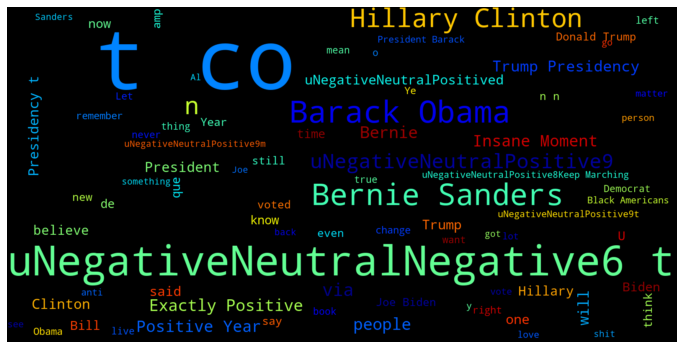

In [457]:
from wordcloud import WordCloud, STOPWORDS, ImageColorGenerator
def word_cloud(wd_list):
    stopwords = set(STOPWORDS)
    all_words = ' '.join([text for text in wd_list])
    wordcloud = WordCloud(
        background_color='black',
        stopwords=stopwords,
        width=1600,
        height=800,
        random_state=1,
        colormap='jet',
        max_words=80,
        max_font_size=200).generate(all_words)
    plt.figure(figsize=(12, 10))
    plt.axis('off')
    plt.imshow(wordcloud, interpolation="bilinear");
word_cloud(csv.Tweet)

# VADER SENTIMENT ANALYSIS FOR  STREAMED TWEEST DATA

In [458]:
# VADER ( Valence Aware Dictionary for Sentiment Reasoning) in the NLTK package and can be applied directly to unlabelled text 
# data.  A model used for text sentiment analysis that is sensitive to both polarity (positive/negative) and intensity (strength)
# of emotion. It is available.

# VADER sentimental analysis relies on a dictionary that maps lexical features to emotion intensities known as sentiment scores. 
# The sentiment score of a text can be obtained by summing up the intensity of each word in the text.
# dictionary of scores in each of four categories as Negative, Neutral, Positive, and compound Normalized scores of
# Positive, Negative, Neutral)

In [459]:
import nltk
nltk.download('vader_lexicon')

[nltk_data] Downloading package vader_lexicon to
[nltk_data]     C:\Users\user\AppData\Roaming\nltk_data...
[nltk_data]   Package vader_lexicon is already up-to-date!


True

In [460]:
from vaderSentiment.vaderSentiment import SentimentIntensityAnalyzer
vader = SentimentIntensityAnalyzer()

In [461]:
# sample check -1
vader.polarity_scores("I happy but bit sad.")

{'neg': 0.437, 'neu': 0.316, 'pos': 0.247, 'compound': -0.4215}

In [462]:
# sample check-2
vader.polarity_scores("I happy.")

{'neg': 0.0, 'neu': 0.213, 'pos': 0.787, 'compound': 0.5719}

In [463]:
csv['Vader_scores'] = csv['Tweet'].apply(lambda Tweets: vader.polarity_scores(Tweets))

In [464]:
csv['compound']  = csv['Vader_scores'].apply(lambda score_dict: score_dict['compound'])

In [465]:
# Fitting the Polarity based on compound in vader 
csv['VaderSentiment']=''
csv.loc[csv.compound>0,'VaderSentiment']='Positive'
csv.loc[csv.compound ==0,'VaderSentiment']='Neutral'
csv.loc[csv.compound<0,'VaderSentiment']='Negative'

In [466]:
csv

,Tweet,Hand_Annotated_Sentiment,Vader_scores,compound,VaderSentiment
0,"""ofc liberals are on the opposite side of that...",Neutral,"{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound...",0.0000,Neutral
4,"""Bernie Sanders reveals that the family feel s...",Positive,"{'neg': 0.168, 'neu': 0.71, 'pos': 0.123, 'com...",-0.1779,Negative
8,"""TRUE TRUE TRUE""",Neutral,"{'neg': 0.0, 'neu': 0.0, 'pos': 1.0, 'compound...",0.8126,Positive
14,"""The Neverending Grift""",Negative,"{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound...",0.0000,Neutral
16,"""Bernie Sanders is including the $Positive5 mi...",Positive,"{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound...",0.0000,Neutral
...,...,...,...,...,...
5608,"""presidency",Neutral,"{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound...",0.0000,Neutral
5618,""" Reminds me of how this God-fearing country u...",Positive,"{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound...",0.0000,Neutral
5624,""" Kamala Harris\nBarack Obama.""",Neutral,"{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound...",0.0000,Neutral
5626,""" Twitter has your image flagged as \""potent...",Negative,"{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound...",0.0000,Neutral


In [467]:
csv.VaderSentiment[:2]

0     Neutral
4    Negative
Name: VaderSentiment, dtype: object

In [468]:
csv['Tweet'].shape

(751,)

In [469]:
csv['VaderSentiment'].value_counts() # Vader sentiments count

Neutral     375
Positive    223
Negative    153
Name: VaderSentiment, dtype: int64

In [470]:
csv['Hand_Annotated_Sentiment'].value_counts() # Hand Annotated Sentiment Count

Neutral     289
Negative    235
Positive    227
Name: Hand_Annotated_Sentiment, dtype: int64

<AxesSubplot:title={'center':'Hand_Annotated_Sentiment Analysis'}>

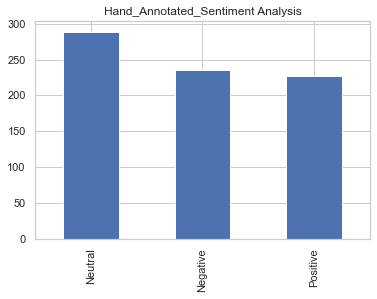

In [471]:
csv['Hand_Annotated_Sentiment'].value_counts().plot(kind='bar',title="Hand_Annotated_Sentiment Analysis")

<AxesSubplot:title={'center':'VaderSentiment Analysis'}>

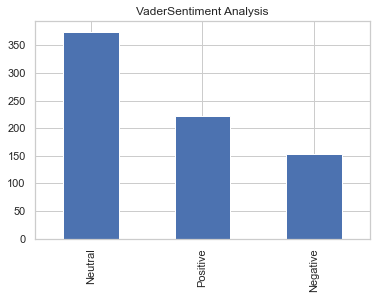

In [472]:
csv['VaderSentiment'].value_counts().plot(kind='bar',title="VaderSentiment Analysis")

In [473]:
csv.to_csv( "_POLARITY.csv", index=False, encoding='utf-8-sig') # New CSV with Polarity 

# NLP

In [474]:
# importing the NLP(Natural Language Processing) library
#from textblob import TextBlob
import nltk
nltk.download('punkt')
nltk.download('stopwords')
nltk.download('wordnet')
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer, PorterStemmer
from nltk.tokenize import word_tokenize

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\user\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\user\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\user\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


In [475]:
def tokenize(text):
    return word_tokenize(text)

def remove_stop_words(text):
    stop_words=stopwords.words('english')
    return([token.lower() for token in text if token not in stop_words])

def remove_punct(text):
    puncts = "~`!@#€$%^&*()_-+={[}]|\/:;'<,>.?/"
    return ([char for char in text if char not in puncts])

def stem_words(text):
    stemmer = WordNetLemmatizer()
    return ([stemmer.lemmatize(token) for token in text])

def stem_words_more(text):
    stemmer = PorterStemmer()
    return ([stemmer.stem(token) for token in text])

def cleaning_the_data(input):
    return_list = []
    for i in input:
        return_list.append(stem_words_more(stem_words(remove_punct(remove_stop_words(tokenize(i))))))
    return return_list

def Mummy(doc):
    return doc

#cleaning_the_data ="Hi how are you https://www.£4%^&*($djsdlkfui) thanking you and happyier"
#cleaning_the_data

In [476]:
# z Is the vader for comparision. 

x,y= csv.Tweet, csv.Hand_Annotated_Sentiment
Z= csv.VaderSentiment

In [477]:
# Splitting Dataset 

from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test, Z_train, Z_test = train_test_split(x,y,Z, test_size = 0.20, random_state = 2)
print("X-Test Shape: ", x_test.shape,'\n' "Y-Train Shape:", y_train.shape)
print("X-Test Shape: ", x_test.shape,'\n' "Y-Train Shape:", y_train.shape)
print("Z-Test Shape: ", Z_test.shape,'\n' "Z-Train Shape:", Z_train.shape)

X-Test Shape:  (151,) 
Y-Train Shape: (600,)
X-Test Shape:  (151,) 
Y-Train Shape: (600,)
Z-Test Shape:  (151,) 
Z-Train Shape: (600,)


In [478]:
x_train = cleaning_the_data(x_train)
x_test = cleaning_the_data(x_test)


In [479]:
#x_train

In [480]:
from sklearn.feature_extraction.text import TfidfVectorizer
tfidf = TfidfVectorizer(analyzer='word', tokenizer=Mummy, preprocessor=Mummy, token_pattern=None)
x_train = tfidf.fit_transform(x_train)
x_test = tfidf.transform(x_test)
#x_train[:2]

# Modelling of Hand Annotated Tweets

# Naive Bayes

In [481]:
# It doesn't require as much training data. It handles both continuous and discrete data. 
# It is highly scalable with the number of predictors and data points. 
# It is fast and can be used to make real-time predictions

In [482]:
# Naive Bayes
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import accuracy_score, classification_report, precision_score, recall_score, confusion_matrix, roc_auc_score

In [483]:
print('-'*70)
print('\t\t MultinomialNB')
print('-'*70)

model = MultinomialNB()

model.fit (x_train, y_train)

y_pred = model.predict(x_test)

print(classification_report(y_test, y_pred))

----------------------------------------------------------------------
		 MultinomialNB
----------------------------------------------------------------------
              precision    recall  f1-score   support

    Negative       0.46      0.65      0.54        40
     Neutral       0.71      0.68      0.69        65
    Positive       0.52      0.37      0.43        46

    accuracy                           0.58       151
   macro avg       0.56      0.57      0.55       151
weighted avg       0.59      0.58      0.57       151



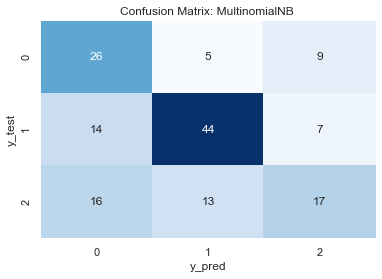

In [484]:
cm = pd.DataFrame(confusion_matrix(y_test, y_pred))
cm
sns.heatmap(cm,cbar=False,annot=True,cmap='Blues',fmt="d")
plt.xlabel("y_pred")
plt.ylabel("y_test")
plt.title("Confusion Matrix: MultinomialNB ")
plt.show()


In [485]:
cm

,0,1,2
0,26,5,9
1,14,44,7
2,16,13,17


In [486]:
print("Accuracy Score", accuracy_score(y_test, y_pred))
print("Model Score: ", model.score(x_test, y_test))

Accuracy Score 0.5761589403973509
Model Score:  0.5761589403973509


# Naive Bayes Predicted Sentiment Vs Hand Annotated Sentiment Vs Vader Sentiment

In [487]:
submission_result = pd.DataFrame({'tweet': x_test, 'Naive_Bayes_Predicted_Sentiment':y_pred,'Hand_ANNOTATED_Sentiment': y_test,'VADER_ANNOTATED_Sentiment': Z_test })
submission_result

,tweet,Naive_Bayes_Predicted_Sentiment,Hand_ANNOTATED_Sentiment,VADER_ANNOTATED_Sentiment
2805,"(0, 438)\t0.19874936991663594\n (0, 20)\t0....",Positive,Neutral,Neutral
5442,"(0, 438)\t0.19874936991663594\n (0, 20)\t0....",Negative,Negative,Negative
5348,"(0, 438)\t0.19874936991663594\n (0, 20)\t0....",Positive,Positive,Positive
3567,"(0, 438)\t0.19874936991663594\n (0, 20)\t0....",Neutral,Neutral,Neutral
462,"(0, 438)\t0.19874936991663594\n (0, 20)\t0....",Neutral,Neutral,Neutral
...,...,...,...,...
4669,"(0, 438)\t0.19874936991663594\n (0, 20)\t0....",Positive,Positive,Positive
4555,"(0, 438)\t0.19874936991663594\n (0, 20)\t0....",Neutral,Neutral,Neutral
4790,"(0, 438)\t0.19874936991663594\n (0, 20)\t0....",Negative,Negative,Negative
1659,"(0, 438)\t0.19874936991663594\n (0, 20)\t0....",Negative,Negative,Positive


In [488]:
#y_pred.plot

C:\Users\user\anaconda3\envs\MLEnv\lib\site-packages\seaborn\_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


<AxesSubplot:ylabel='count'>

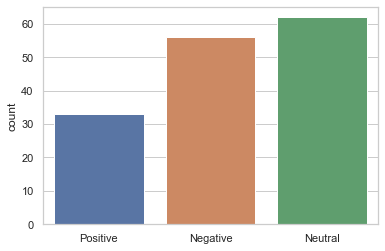

In [489]:
sns.countplot(y_pred)

In [490]:
# from this we can tell that the Predicted Model of the naive bayes is 100% Matched with the Actual Sentiment as the Vader tool

# SVM

In [491]:
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.preprocessing import MinMaxScaler
from sklearn import svm
from sklearn.svm import SVR,SVC
from sklearn.metrics import confusion_matrix, accuracy_score, f1_score

In [492]:
svc = SVC(class_weight="balanced", kernel='rbf', C=1, gamma=0.1)
cv = cross_val_score(svc, x_train, y_train, cv=10)
print('Values', cv)
print('Avg ' , cv.mean())
print('Std ' , cv.std())
model = svc.fit(x_train, y_train)
score = model.score(x_test, y_test)
print('Score', score)
rbf_y_pred = model.predict(x_test)
cm = pd.DataFrame(confusion_matrix(y_test, rbf_y_pred))
cm

Values [0.43333333 0.38333333 0.41666667 0.35       0.48333333 0.48333333
 0.43333333 0.53333333 0.33333333 0.53333333]
Avg  0.43833333333333335
Std  0.06668749674580852
Score 0.5165562913907285


,0,1,2
0,6,7,27
1,2,38,25
2,0,12,34


In [493]:
print(classification_report(y_test, rbf_y_pred))

              precision    recall  f1-score   support

    Negative       0.75      0.15      0.25        40
     Neutral       0.67      0.58      0.62        65
    Positive       0.40      0.74      0.52        46

    accuracy                           0.52       151
   macro avg       0.60      0.49      0.46       151
weighted avg       0.61      0.52      0.49       151



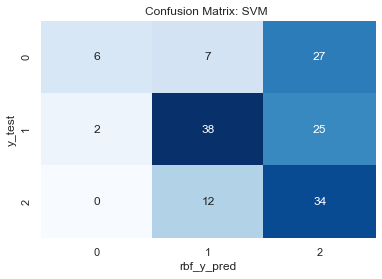

In [494]:
cm = pd.DataFrame(confusion_matrix(y_test,rbf_y_pred))
cm
sns.heatmap(cm,cbar=False,annot=True,cmap='Blues',fmt="d")
plt.xlabel("rbf_y_pred")
plt.ylabel("y_test")
plt.title("Confusion Matrix: SVM ")
plt.show()


In [495]:
print("Accuracy Score", accuracy_score(y_test,rbf_y_pred))

Accuracy Score 0.5165562913907285


# SVM Predicted Sentiment Vs Hand Annotated Sentiment Vs Vader Sentiment

In [496]:
submission_result = pd.DataFrame({'tweet': x_test, 'Predicted_Sentiment': rbf_y_pred, 'Hand_ANNOTATED_Sentiment': y_test,'VADER_ANNOTATED_Sentiment': Z_test })
submission_result

,tweet,Predicted_Sentiment,Hand_ANNOTATED_Sentiment,VADER_ANNOTATED_Sentiment
2805,"(0, 0)\t0.25625697376813805\n (0, 20)\t0.94...",Positive,Neutral,Neutral
5442,"(0, 0)\t0.25625697376813805\n (0, 20)\t0.94...",Negative,Negative,Negative
5348,"(0, 0)\t0.25625697376813805\n (0, 20)\t0.94...",Positive,Positive,Positive
3567,"(0, 0)\t0.25625697376813805\n (0, 20)\t0.94...",Positive,Neutral,Neutral
462,"(0, 0)\t0.25625697376813805\n (0, 20)\t0.94...",Neutral,Neutral,Neutral
...,...,...,...,...
4669,"(0, 0)\t0.25625697376813805\n (0, 20)\t0.94...",Positive,Positive,Positive
4555,"(0, 0)\t0.25625697376813805\n (0, 20)\t0.94...",Neutral,Neutral,Neutral
4790,"(0, 0)\t0.25625697376813805\n (0, 20)\t0.94...",Positive,Negative,Negative
1659,"(0, 0)\t0.25625697376813805\n (0, 20)\t0.94...",Positive,Negative,Positive


C:\Users\user\anaconda3\envs\MLEnv\lib\site-packages\seaborn\_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


<AxesSubplot:ylabel='count'>

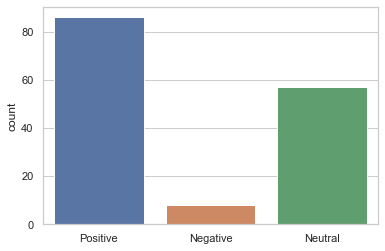

In [497]:
sns.countplot(rbf_y_pred)

In [498]:
# Comparision of the Predicted Sentiment Vs the hand Annotated Sentiment tell that the Accuracy is 50 % accurate. 


# Label Encoding For Neural Networks

In [499]:
from sklearn import preprocessing
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
new_sentiment= le.fit_transform(csv['Hand_Annotated_Sentiment'])
new_VaderSentiment = le.fit_transform(csv['VaderSentiment']) # FOR VADER
#0-> Neutral
#1-> Negative
#2-> Positive

In [500]:
# Setting of Label Encoded variable
y1= new_sentiment
y1_train, y1_test = train_test_split(y1,test_size=0.20, shuffle= True)

In [501]:
# Setting of Label Encoded variable FOR VADER
Z1= new_VaderSentiment
Z1_train, Z1_test = train_test_split(Z1,test_size=0.20, shuffle= True)

In [502]:
#new_sentiment.value_counts()

# MLP Classifier

In [503]:
#Importing MLPClassifier
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import accuracy_score#,model_score
from sklearn.metrics import mean_absolute_error,mean_squared_error ,r2_score

In [504]:
#Initializing the MLPClassifier
classifier = MLPClassifier(hidden_layer_sizes=(150,100,50), max_iter=300,activation = 'relu',solver='adam',random_state=1)
classifier.fit(x_train, y1_train)
MLP_y_pred = classifier.predict(x_test)

In [505]:
print('-'*70)
print('\t\t MLPClassifier')
print('-'*70)

#Comparing the predictions against the actual observations 
cm1 = confusion_matrix(y1_test, MLP_y_pred)
cm1
#Printing the accuracy
print ("Accuracy of MLPClassifier :",accuracy_score(y1_test, MLP_y_pred))
#print("Model Score: ", model_score(x_test, y_test))
print("R-Square value ",r2_score(y1_test, MLP_y_pred))
print("Classification Report: ", classification_report(y1_test, MLP_y_pred) )

----------------------------------------------------------------------
		 MLPClassifier
----------------------------------------------------------------------
Accuracy of MLPClassifier : 0.3708609271523179
R-Square value  -1.0039032006245123
Classification Report:                precision    recall  f1-score   support

           0       0.29      0.31      0.30        45
           1       0.47      0.45      0.46        66
           2       0.32      0.30      0.31        40

    accuracy                           0.37       151
   macro avg       0.36      0.36      0.36       151
weighted avg       0.37      0.37      0.37       151



In [506]:
#0-> Neutral
#1-> Negative
#2-> Positive

In [507]:
print("Accuracy Score", accuracy_score(y1_test, MLP_y_pred))

Accuracy Score 0.3708609271523179


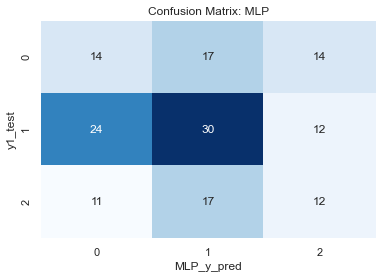

In [508]:
sns.heatmap(cm1,cbar=False,annot=True,cmap='Blues',fmt="d")
plt.xlabel("MLP_y_pred")
plt.ylabel("y1_test")
plt.title("Confusion Matrix: MLP")
plt.show()

# MLP Classifier Predicted Sentiment Vs Hand Annotated Sentiment Vs Vader Sentiment

In [509]:
#0-> Neutral
#1-> Negative
#2-> Positive

In [510]:
submission_result1 = pd.DataFrame({'tweet': x_test, 'Predicted_Sentiment':MLP_y_pred,'Hand_annotated_Sentiment': y1_test,'VADER_ANNOTATED_Sentiment': Z1_test})
submission_result1

,tweet,Predicted_Sentiment,Hand_annotated_Sentiment,VADER_ANNOTATED_Sentiment
0,"(0, 0)\t0.25625697376813805\n (0, 20)\t0.94...",0,2,1
1,"(0, 0)\t0.25625697376813805\n (0, 20)\t0.94...",2,2,0
2,"(0, 0)\t0.25625697376813805\n (0, 20)\t0.94...",0,1,0
3,"(0, 0)\t0.25625697376813805\n (0, 20)\t0.94...",0,0,2
4,"(0, 0)\t0.25625697376813805\n (0, 20)\t0.94...",0,2,2
...,...,...,...,...
146,"(0, 0)\t0.25625697376813805\n (0, 20)\t0.94...",0,2,1
147,"(0, 0)\t0.25625697376813805\n (0, 20)\t0.94...",0,2,0
148,"(0, 0)\t0.25625697376813805\n (0, 20)\t0.94...",2,0,0
149,"(0, 0)\t0.25625697376813805\n (0, 20)\t0.94...",2,0,1


C:\Users\user\anaconda3\envs\MLEnv\lib\site-packages\seaborn\_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


<AxesSubplot:ylabel='count'>

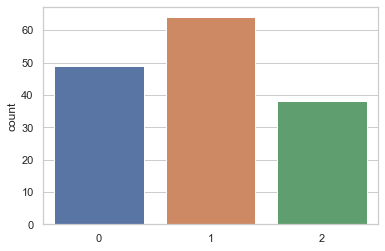

In [511]:
sns.countplot(MLP_y_pred)

In [512]:
# Comparision of the Predicted Sentiment Vs the hand Annotated Sentiment tell that the Accuracy is very less 
# when compared with vader which is complete difference

# Perceptron

In [513]:
from sklearn.linear_model import Perceptron

In [514]:
print('-'*70)
print('\t\t Perceptron')
print('-'*70)
nn = Perceptron()
nn.fit(x_train, y1_train)
nn_y_pred = nn.predict(x_test)
print(classification_report(y1_test, nn_y_pred))

----------------------------------------------------------------------
		 Perceptron
----------------------------------------------------------------------
              precision    recall  f1-score   support

           0       0.33      0.31      0.32        45
           1       0.51      0.58      0.54        66
           2       0.35      0.30      0.32        40

    accuracy                           0.42       151
   macro avg       0.40      0.40      0.40       151
weighted avg       0.41      0.42      0.42       151



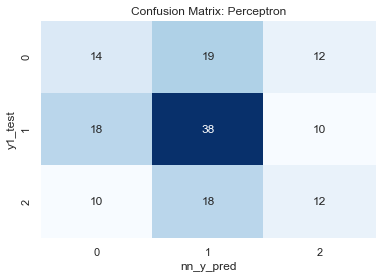

In [515]:
cm2 = confusion_matrix(y1_test, nn_y_pred)
sns.heatmap(cm2,cbar=False,annot=True,cmap='Blues',fmt="d")
plt.xlabel("nn_y_pred")
plt.ylabel("y1_test")
plt.title("Confusion Matrix: Perceptron")
plt.show()

In [516]:
print("Accuracy Score", accuracy_score(y1_test, nn_y_pred))

Accuracy Score 0.423841059602649


# Perceptron Predicted Sentiment Vs Hand Annotated Sentiment Vs Vader Sentiment

In [517]:
#0-> Neutral
#1-> Negative
#2-> Positive

In [518]:
submission_result2 = pd.DataFrame({'tweet': x_test, 'Predicted_Sentiment':nn_y_pred,'Actual_Sentiment': y1_test,'VADER_ANNOTATED_Sentiment': Z1_test})
submission_result2

,tweet,Predicted_Sentiment,Actual_Sentiment,VADER_ANNOTATED_Sentiment
0,"(0, 0)\t0.25625697376813805\n (0, 20)\t0.94...",0,2,1
1,"(0, 0)\t0.25625697376813805\n (0, 20)\t0.94...",2,2,0
2,"(0, 0)\t0.25625697376813805\n (0, 20)\t0.94...",0,1,0
3,"(0, 0)\t0.25625697376813805\n (0, 20)\t0.94...",1,0,2
4,"(0, 0)\t0.25625697376813805\n (0, 20)\t0.94...",0,2,2
...,...,...,...,...
146,"(0, 0)\t0.25625697376813805\n (0, 20)\t0.94...",0,2,1
147,"(0, 0)\t0.25625697376813805\n (0, 20)\t0.94...",1,2,0
148,"(0, 0)\t0.25625697376813805\n (0, 20)\t0.94...",0,0,0
149,"(0, 0)\t0.25625697376813805\n (0, 20)\t0.94...",2,0,1


C:\Users\user\anaconda3\envs\MLEnv\lib\site-packages\seaborn\_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


<AxesSubplot:ylabel='count'>

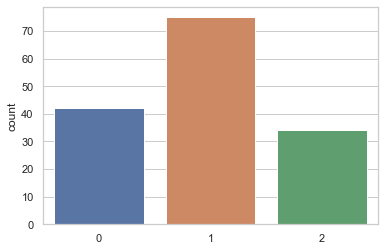

In [519]:
sns.countplot(nn_y_pred)

In [520]:
# Comparision of the Predicted Sentiment Vs the hand Annotated Sentiment tell that the Accuracy is very less 
# when compared with vader which is complete difference

# Overall Hand Annotated Model Accuracy

In [521]:
# From this we can tell that the Accuracy is only 39% and we can look at  the actual vs the Predicted sentiment

In [522]:
final = pd.DataFrame({'MODELS': ["Naive Bayes","MLP-Classifier","Perceptron","SVM-rbf-Kernel"],
'ACCURACY': [accuracy_score(y_test, y_pred),accuracy_score(y1_test, MLP_y_pred),accuracy_score(y1_test, nn_y_pred), accuracy_score(y_test, rbf_y_pred)] })

In [523]:
# Each Model Strength and Weakness 

end= final.sort_values(by='ACCURACY', ascending=False)
end_all = end.set_index('ACCURACY')
end_all

,MODELS
ACCURACY,
0.576159,Naive Bayes
0.516556,SVM-rbf-Kernel
0.423841,Perceptron
0.370861,MLP-Classifier


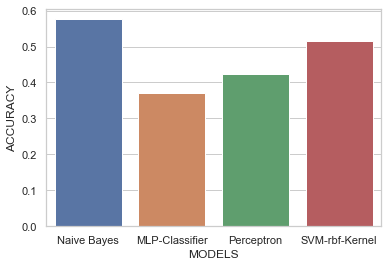

In [524]:
sns.set_theme(style="whitegrid")
ax = sns.barplot(data = final, x="MODELS", y="ACCURACY")

In [525]:
# Best Model with the exact prediction on compared with the Vader is Naive Bayes  
# other Models produce very Less Accuraccy

# Comparing the Vader Annotated Sentiment  Accuracy with the Models

In [526]:
model = MultinomialNB() # Naive Bayes
model.fit (x_train, Z_train)
y_pred1 = model.predict(x_test)
print("Accuracy Score", accuracy_score(Z_test, y_pred1))

Accuracy Score 0.5629139072847682


In [527]:
model = svc.fit(x_train, Z_train) # SVM rbf Kernel
rbf_y_pred1 = model.predict(x_test)
print("Accuracy Score", accuracy_score(Z_test, rbf_y_pred1))

Accuracy Score 0.5496688741721855


In [528]:
classifier.fit(x_train, Z1_train) # MLP classifier
MLP_y_pred1 = classifier.predict(x_test)
print("Accuracy Score", accuracy_score(Z1_test, MLP_y_pred1))

Accuracy Score 0.2913907284768212


In [529]:
nn.fit(x_train, Z1_train)  # Perceptron
nn_y_pred1 = nn.predict(x_test)
print("Accuracy Score", accuracy_score(Z1_test, nn_y_pred1))

Accuracy Score 0.271523178807947


# Overall Accuracy for the Vader Sentiment with the Models 

In [530]:
final2 = pd.DataFrame({'MODELS': ["Naive Bayes","MLP-Classifier","Perceptron","SVM-rbf-Kernel"],
'ACCURACY': [accuracy_score(Z_test, y_pred1),accuracy_score(Z1_test, MLP_y_pred1),accuracy_score(Z1_test, nn_y_pred1), accuracy_score(Z_test, rbf_y_pred1)] })

In [531]:
# Each Model Strength and Weakness 

end3= final2.sort_values(by='ACCURACY', ascending=False)
end_all3 = end3.set_index('ACCURACY')
end_all3

,MODELS
ACCURACY,
0.562914,Naive Bayes
0.549669,SVM-rbf-Kernel
0.291391,MLP-Classifier
0.271523,Perceptron


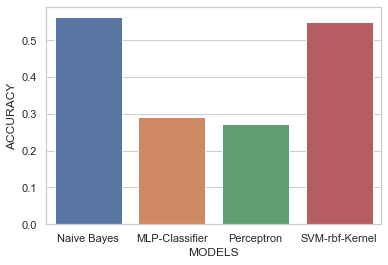

In [532]:
sns.set_theme(style="whitegrid")
ax = sns.barplot(data = final2, x="MODELS", y="ACCURACY")

In [533]:
# From this Study we can understand abou the Vader Sentiment Tool and its Comparision with THE DESIGNED model

In [534]:
# From this anlayis we can tell that Vader Accuracy % is very slightly less with the actual model 
# with the hand annotated tweets model

# TESTING MODEL WITH AIRLINE DATASET

In [535]:
# Testing of the model with the american with american airlines industry flights like (virgin, atlantic,united, jetblue)

In [536]:
virgin = pd.read_csv("C:/Users/user/PycharmProjects/Twitter _tweets_fetching/tweets_csv/new_csv/Airline.csv")

In [537]:
virgin.text= pd.DataFrame(virgin.text.apply(cleaning)) # Cleaning of dataset

In [538]:
virgin[:2]

,airline_sentiment,text
0,neutral,What said.
1,positive,plus you've added commercials to the experien...


In [539]:
virgin['airline_sentiment'].value_counts()

negative    2307
neutral      717
positive     540
Name: airline_sentiment, dtype: int64

# Comparing with Vader for the Testing Airline Dataset.

In [540]:
# performing vader for the testing dataset.

In [541]:
virgin['Vader_scores'] = virgin['text'].apply(lambda text: vader.polarity_scores(text))

In [542]:
virgin['compound']  = virgin['Vader_scores'].apply(lambda score_dict: score_dict['compound'])

In [543]:
# Fitting the Polarity based on compound in vader 
virgin['VaderSentiment']=''
virgin.loc[virgin.compound>0,'VaderSentiment']='Positive'
virgin.loc[virgin.compound ==0,'VaderSentiment']='Neutral'
virgin.loc[virgin.compound<0,'VaderSentiment']='Negative'

In [544]:
virgin

,airline_sentiment,text,Vader_scores,compound,VaderSentiment
0,neutral,What said.,"{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound...",0.0000,Neutral
1,positive,plus you've added commercials to the experien...,"{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound...",0.0000,Neutral
2,neutral,I didn't today... Must mean I need to take an...,"{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound...",0.0000,Neutral
3,negative,"it's really aggressive to blast obnoxious ""en...","{'neg': 0.236, 'neu': 0.628, 'pos': 0.135, 'co...",-0.2716,Negative
4,negative,and it's a really big bad thing about it,"{'neg': 0.321, 'neu': 0.679, 'pos': 0.0, 'comp...",-0.5829,Negative
...,...,...,...,...,...
3559,negative,Trying to change a flight booked just 6 hours...,"{'neg': 0.0, 'neu': 0.772, 'pos': 0.228, 'comp...",0.7579,Positive
3560,negative,I have submitted my complaint. I need to be c...,"{'neg': 0.136, 'neu': 0.864, 'pos': 0.0, 'comp...",-0.2960,Negative
3561,neutral,any info on delays at SFO tomorrow due to low...,"{'neg': 0.174, 'neu': 0.826, 'pos': 0.0, 'comp...",-0.2732,Negative
3562,negative,"because of the horrific flight experience, yo...","{'neg': 0.274, 'neu': 0.726, 'pos': 0.0, 'comp...",-0.7776,Negative


In [545]:
virgin['VaderSentiment'].value_counts()

Positive    1511
Negative    1339
Neutral      714
Name: VaderSentiment, dtype: int64

In [546]:
x2,y2,z2= virgin.text,virgin.airline_sentiment,virgin.VaderSentiment

In [547]:
x2_train, x2_test, y2_train, y2_test, z2_train,z2_test = train_test_split(x2,y2,z2, test_size = 0.20, random_state = 2)
print("X2-Train Shape: ", x2_train.shape,'\n' "x2-Test Shape:", x2_test.shape)
print("X2-Train Shape: ", x2_train.shape,'\n' "Y2-Test Shape:", y2_test.shape)
print("Z2-Train Shape: ", z2_train.shape,'\n' "z2-Test Shape:", z2_test.shape)

X2-Train Shape:  (2851,) 
x2-Test Shape: (713,)
X2-Train Shape:  (2851,) 
Y2-Test Shape: (713,)
Z2-Train Shape:  (2851,) 
z2-Test Shape: (713,)


In [548]:
x2_train = cleaning_the_data(x2_train) # Calling NLP function
x2_test = cleaning_the_data(x2_test) # Calling NLP function

In [549]:
#tfidf = TfidfVectorizer(analyzer='word', tokenizer=Mummy, preprocessor=Mummy, token_pattern=None)
x2_train = tfidf.fit_transform(x2_train) # Tfidf 
x2_test = tfidf.transform(x2_test)      # Tfidf

# Testing with the Given Annonated Sentimet using Naive Bayes, SVM of the Airleline Dataset.

In [550]:
model = MultinomialNB() # Naive Bayes
model.fit (x2_train, y2_train)
cy_pred = model.predict(x2_test)
print("Accuracy Score", accuracy_score(y2_test, cy_pred))

Accuracy Score 0.6549789621318373


In [551]:
model = svc.fit(x2_train, y2_train)  # SVM rbf Kerenel
rbf1_y_pred = model.predict(x2_test)
print("Accuracy Score", accuracy_score(y2_test, rbf1_y_pred))

Accuracy Score 0.6914446002805049


# Testing with the Vader Annonated Sentimet using Naive Bayes, SVM of the Airleline Dataset.

In [552]:
model = MultinomialNB() # Naive Bayes
model.fit (x2_train, z2_train)
my1_pred = model.predict(x2_test)
print("Accuracy Score", accuracy_score(z2_test, my1_pred))

Accuracy Score 0.6451612903225806


In [553]:
model = svc.fit(x2_train, z2_train)  # SVM rbf Kerenel
vrbf_y_pred = model.predict(x2_test)
print("Accuracy Score", accuracy_score(z2_test, vrbf_y_pred))

Accuracy Score 0.5680224403927069


# Testing with the Given Annonated Sentimet using MLP Classifier and percepton of the Airleline Dataset.

In [554]:
virgin['airline_sentiment']= le.fit_transform(virgin['airline_sentiment']) #Label Encoding for testing tweets
#0-> Neutral
#1-> Negative
#2-> Positive

In [555]:
classifier.fit(x2_train, y2_train) # MLP Classifier
MLP1_y_pred = classifier.predict(x2_test)
print("Accuracy Score", accuracy_score(y2_test, MLP1_y_pred))

Accuracy Score 0.7237026647966339


In [556]:
nn.fit(x2_train, y2_train)   # Perceptron
nn1_y_pred = nn.predict(x2_test)
print("Accuracy Score", accuracy_score(y2_test, nn1_y_pred))

Accuracy Score 0.7307152875175316


# Testing with the Vader Annonated Sentimet using MLP classifier and Perceptron of the Airleline Dataset.

In [557]:
classifier.fit(x2_train, z2_train) # MLP Classifier
aMLP_y_pred = classifier.predict(x2_test)
print("Accuracy Score", accuracy_score(z2_test, aMLP_y_pred))

Accuracy Score 0.6521739130434783


In [558]:
nn.fit(x2_train, z2_train)   # Perceptron
ann_y_pred = nn.predict(x2_test)
print("Accuracy Score", accuracy_score(z2_test, ann_y_pred))

Accuracy Score 0.6605890603085554


# Overall Accuracy for the Testing Models (Given Annotated sentiment in Dataset)

In [559]:
# Testing Accuracy of the Given Annotated sentiment(Dataset) using the Models which we built 

In [560]:
final = pd.DataFrame({'TESTING Models on given Annotation': ["Naive Bayes","MLP-Classifier","Perceptron","SVM-rbf-Kernel"],
'ACCURACY': [accuracy_score(y2_test, cy_pred),accuracy_score(y2_test, MLP1_y_pred),accuracy_score(y2_test, nn1_y_pred), accuracy_score(y2_test, rbf1_y_pred)] })

In [561]:
# Each Model Strength and Weakness 
end= final.sort_values(by='ACCURACY', ascending=False)
end_all1 = end.set_index('ACCURACY')
end_all1

,TESTING Models on given Annotation
ACCURACY,
0.730715,Perceptron
0.723703,MLP-Classifier
0.691445,SVM-rbf-Kernel
0.654979,Naive Bayes


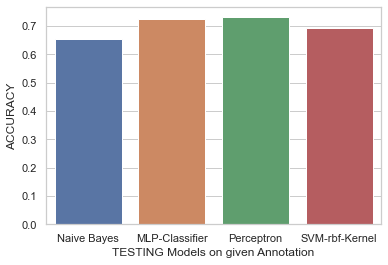

In [562]:
sns.set_theme(style="whitegrid")
ax = sns.barplot(data = final, x="TESTING Models on given Annotation", y="ACCURACY")

In [563]:
# On comparing with the testing models vs the Actual Models we can tell that the testing models are in 
# good performance as it has the actual sentiment rather than hand annotated.

# Overall Accuracy for the Testing Models (Vader Annotated sentiment, which we did.)

In [564]:
overall = pd.DataFrame({'TESTING Modles On Vader': ["Naive Bayes","MLP-Classifier","Perceptron","SVM-rbf-Kernel"],
'ACCURACY': [accuracy_score(z2_test, my1_pred),accuracy_score(z2_test, aMLP_y_pred),accuracy_score(z2_test, ann_y_pred), accuracy_score(z2_test, vrbf_y_pred)] })

In [565]:
# Each Model Strength and Weakness 
end= overall.sort_values(by='ACCURACY', ascending=False)
end_all1 = end.set_index('ACCURACY')
end_all1

,TESTING Modles On Vader
ACCURACY,
0.660589,Perceptron
0.652174,MLP-Classifier
0.645161,Naive Bayes
0.568022,SVM-rbf-Kernel


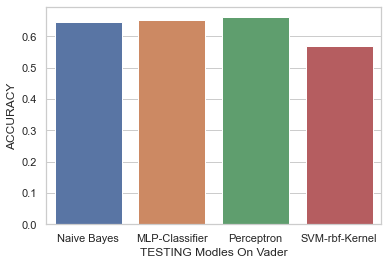

In [566]:
sns.set_theme(style="whitegrid")
ax = sns.barplot(data = overall, x="TESTING Modles On Vader", y="ACCURACY")

# Conclusion

In [567]:
# from this detailed analysis of our US Political Persons
   #-> we can tell that our hand annotated sentiment were very Effective, 
   #-> Vader Annotated sentiment were not that much logical and Less Effective,
   #-> Result of hand annotated vs Vader tells that Hand Annotated is good rather than Vader Accuracy.

# Testing of the US Airline dataset to validate our claim towards the US Political Persons data is Proved.
  #-> The Given Annotated sentiment of the US Airline is effective 
  #-> Vader Annotated sentiment which we crated is less effective and No logical understanding of meaning it considered.
  #-> Result of the Given Annotated Sentiment is Very good and rather than Vader Accuracy

#-> Therefore testing is hence proved and our Hand Annotated for the US Political persons are Correct on comparing with 
    # Tested Dataset of US Airlines.